# **Análise da Infraestrutura Escolar no Brasil (Censo Escolar 2024)**

---

Este notebook apresenta uma análise exploratória sobre a infraestrutura das escolas brasileiras, com base nos microdados do Censo Escolar de 2024 (INEP).

A motivação é compreender como o acesso a recursos básicos — como água potável, internet, biblioteca, quadra esportiva e acessibilidade — varia entre as diferentes regiões do país, tipos de rede (federal, estadual, municipal, privada) e localização (urbana ou rural).

Este trabalho tem como objetivo colocar em prática conhecimentos de análise de dados com Python, utilizando bibliotecas como Pandas, Matplotlib e Seaborn, explorando a visualização e interpretação de dados reais da educação brasileira.




In [1]:
# Importação de módulos e bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import gdown
import matplotlib.pyplot as plt
from IPython.display import display

#Importação do dataset utilizado
url = 'https://drive.google.com/uc?id=17kFdCUJ-7Q4C6JNuhukihCI5s6I30Qve'  # substitua pelo seu ID real
output = 'microdados_ed_basica_2024.csv'

gdown.download(url, output, quiet=False)

df = pd.read_csv("microdados_ed_basica_2024.csv", sep=";", encoding="latin1")

Downloading...
From (original): https://drive.google.com/uc?id=17kFdCUJ-7Q4C6JNuhukihCI5s6I30Qve
From (redirected): https://drive.google.com/uc?id=17kFdCUJ-7Q4C6JNuhukihCI5s6I30Qve&confirm=t&uuid=1449f84e-bc10-4c21-8d47-97cc066aef50
To: /content/microdados_ed_basica_2024.csv
100%|██████████| 218M/218M [00:02<00:00, 95.7MB/s]
/tmp/ipython-input-1-675095762.py:19: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("microdados_ed_basica_2024.csv", sep=";", encoding="latin1")


## Seleção e limpeza de dados

A partir do dataset original, foi criado um novo dataset composto apenas pelas colunas relevantes para esta análise: identificadores geográficos (região, UF), tipo de rede e localização da escola, além de indicadores binários sobre a infraestrutura presente.

Após esse processo, foram removidas as linhas com dados ausentes nas colunas que foram selecionadas do dataset original.

Além disso, as variáveis categóricas como tipo de rede e localização foram convertidas para valores legíveis (ex: de 1 → "Federal").


In [2]:
# Criando um novo dataframe apenas com as colunas de interesse
colunas_utilizadas = [
    # Agrupamentos
    "NO_REGIAO", "SG_UF", "TP_DEPENDENCIA", "TP_LOCALIZACAO",

    # Recursos básicos
    "IN_AGUA_POTAVEL",
    "IN_ENERGIA_REDE_PUBLICA",
    "IN_ESGOTO_REDE_PUBLICA",
    "IN_INTERNET",
    "IN_BANDA_LARGA",

    # Ambientes pedagógicos
    "IN_BIBLIOTECA",
    "IN_BIBLIOTECA_SALA_LEITURA",
    "IN_LABORATORIO_INFORMATICA",
    "IN_LABORATORIO_CIENCIAS",
    "IN_QUADRA_ESPORTES",
    "IN_QUADRA_ESPORTES_COBERTA",

    # Acessibilidade
    "IN_BANHEIRO_PNE",
    "IN_ACESSIBILIDADE_RAMPAS",
    "IN_ACESSIBILIDADE_ELEVADOR"
]

df_infra = df[colunas_utilizadas]

# Mudando códigos numéricos para palavras legíveis
df_infra.loc[:, "REDE"] = df_infra["TP_DEPENDENCIA"].map({
    1: "Federal",
    2: "Estadual",
    3: "Municipal",
    4: "Privada"
})

df_infra.loc[:, "LOCALIZACAO"] = df_infra["TP_LOCALIZACAO"].map({
    1: "Urbana",
    2: "Rural"
})

# Removendo linhas com NaN
df_infra = df_infra.dropna()

/tmp/ipython-input-2-4119442845.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infra.loc[:, "REDE"] = df_infra["TP_DEPENDENCIA"].map({
/tmp/ipython-input-2-4119442845.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infra.loc[:, "LOCALIZACAO"] = df_infra["TP_LOCALIZACAO"].map({


## Tipos de infrafraestrutura

A tabela a seguir exibe os quatorze tipos de infraestrutura contidos no dataset, bem como suas respectivas categorias.  

In [3]:
# Dicionário com os dados
infra_dict = {
    "Infraestrutura": [
        "IN_AGUA_POTAVEL", "IN_ENERGIA_REDE_PUBLICA", "IN_ESGOTO_REDE_PUBLICA",
        "IN_INTERNET", "IN_BANDA_LARGA",
        "IN_BIBLIOTECA", "IN_BIBLIOTECA_SALA_LEITURA",
        "IN_LABORATORIO_INFORMATICA", "IN_LABORATORIO_CIENCIAS",
        "IN_QUADRA_ESPORTES", "IN_QUADRA_ESPORTES_COBERTA",
        "IN_BANHEIRO_PNE", "IN_ACESSIBILIDADE_RAMPAS", "IN_ACESSIBILIDADE_ELEVADOR"
    ],
    "Descrição": [
        "Possui água potável", "Possui energia elétrica da rede pública", "Possui esgoto ligado à rede pública",
        "Possui acesso à internet", "Possui banda larga",
        "Possui biblioteca", "Possui sala de leitura",
        "Possui laboratório de informática", "Possui laboratório de ciências",
        "Possui quadra esportiva", "Quadra coberta",
        "Banheiro adaptado para PNE", "Acessibilidade por rampas", "Acessibilidade por elevador"
    ],
    "Categoria": [
        "Saneamento", "Energia", "Saneamento",
        "Tecnologia", "Tecnologia",
        "Espaço pedagógico", "Espaço pedagógico",
        "Espaço pedagógico", "Espaço pedagógico",
        "Esporte", "Esporte",
        "Acessibilidade", "Acessibilidade", "Acessibilidade"
    ]
}

# Paleta de cores por categoria
cores_categoria = {
    "Saneamento": "#A8DADC",
    "Energia": "#FFE66D",
    "Tecnologia": "#FFB4A2",
    "Espaço pedagógico": "#B5E48C",
    "Esporte": "#9D9DF1",
    "Acessibilidade": "#F7A072"
}

# Criação do DataFrame e ordenação por Categoria
tabela_infra = pd.DataFrame(infra_dict)
tabela_infra = tabela_infra.sort_values(by="Categoria")

# Função para colorir linha inteira com base na categoria
def colorir_linha_por_categoria(row):
    cor = cores_categoria.get(row["Categoria"], "#DDDDDD")
    return [f'background-color: {cor}; border: 1px solid white;' for _ in row]

# Aplicação do estilo
tabela_estilizada = (
    tabela_infra
    .style
    .apply(colorir_linha_por_categoria, axis=1)  # Cor da linha
    .set_properties(**{'text-align': 'center'})  # Centralizar texto
    .set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center'), ('border', '1px solid white')]}
    ])
)

# Exibir tabela
tabela_estilizada


,Infraestrutura,Descrição,Categoria
11,IN_BANHEIRO_PNE,Banheiro adaptado para PNE,Acessibilidade
12,IN_ACESSIBILIDADE_RAMPAS,Acessibilidade por rampas,Acessibilidade
13,IN_ACESSIBILIDADE_ELEVADOR,Acessibilidade por elevador,Acessibilidade
1,IN_ENERGIA_REDE_PUBLICA,Possui energia elétrica da rede pública,Energia
5,IN_BIBLIOTECA,Possui biblioteca,Espaço pedagógico
6,IN_BIBLIOTECA_SALA_LEITURA,Possui sala de leitura,Espaço pedagógico
7,IN_LABORATORIO_INFORMATICA,Possui laboratório de informática,Espaço pedagógico
8,IN_LABORATORIO_CIENCIAS,Possui laboratório de ciências,Espaço pedagógico
9,IN_QUADRA_ESPORTES,Possui quadra esportiva,Esporte
10,IN_QUADRA_ESPORTES_COBERTA,Quadra coberta,Esporte


### Distribuição de escolas por tipo de rede e região

O mapa de calor abaixo mostra a quantidade total de escolas em cada combinação de tipo de rede (Federal, Estadual, Municipal e Privada) e região geográfica do Brasil, com base nos dados do Censo Escolar 2024.

Cada célula indica quantas escolas daquele tipo estão presentes em determinada região. As cores representam a densidade: quanto mais escura a célula, maior o número de escolas naquela categoria.

Esse gráfico ajuda a entender a distribuição da rede educacional no país, revelando, por exemplo:
- A predominância de escolas estaduais e municipais em todas as regiões.
- A concentração da rede privada no Sudeste.
- A baixa quantidade de escolas federais, mas com presença em todas as regiões.



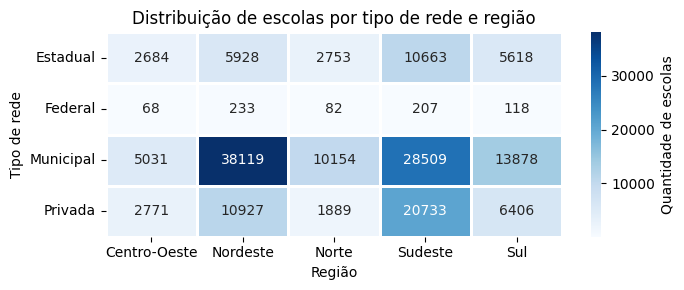

In [4]:
plt.figure(figsize=(7,3))      # Cria a figura e define tamanho
sns.heatmap(                   # Tipo de gráfico
    df_infra.pivot_table(
        values="IN_AGUA_POTAVEL",  # qualquer coluna serve para contar linhas
        index="REDE",
        columns="NO_REGIAO",
        aggfunc="count"
    ),
    annot=True,   # Valores dentro das células
    fmt=".0f",    # Quantidade de casas decimais
    cmap="Blues", # Cor das células
    linewidths=0.8, # Espessura da linha entre células
    cbar_kws={"label": "Quantidade de escolas"}
)

plt.title("Distribuição de escolas por tipo de rede e região")
plt.xlabel("Região")
plt.ylabel("Tipo de rede")
plt.tight_layout()
plt.show()

## Comparação por tipo de rede e região

Considerando a distribuição das escolas pelo território nacional, retomamos o objetivo central desta análise: compreender como os itens de infraestrutura estão distribuídos entre as escolas brasileiras.

O gráfico abaixo mostra a média de itens de infraestrutura por escola, agrupados por tipo de rede (Federal, Estadual, Municipal, Privada) e separados pelas cinco regiões do país.

É possível observar padrões importantes, como o maior nível de infraestrutura em escolas federais e privadas, bem como disparidades regionais.


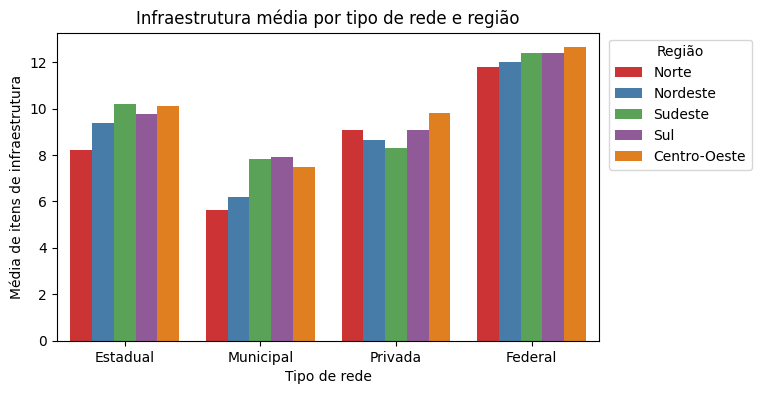

In [5]:
# Criando coluna com somatório de itens de infraestrutura das escolas
colunas_infra = [
    "IN_AGUA_POTAVEL", "IN_ENERGIA_REDE_PUBLICA", "IN_ESGOTO_REDE_PUBLICA",
    "IN_INTERNET", "IN_BANDA_LARGA", "IN_BIBLIOTECA", "IN_BIBLIOTECA_SALA_LEITURA",
    "IN_LABORATORIO_INFORMATICA", "IN_LABORATORIO_CIENCIAS",
    "IN_QUADRA_ESPORTES", "IN_QUADRA_ESPORTES_COBERTA",
    "IN_BANHEIRO_PNE", "IN_ACESSIBILIDADE_RAMPAS", "IN_ACESSIBILIDADE_ELEVADOR"
]

df_infra["TOTAL_INFRA"] = df_infra[colunas_infra].sum(axis=1)

plt.figure(figsize=(7,4))
sns.barplot(
    data=df_infra,
    x="REDE",
    y="TOTAL_INFRA",
    hue="NO_REGIAO",
    estimator="mean",
    errorbar=None,  # remove as barras de erro para focar apenas nas médias
    palette="Set1"
)
plt.title("Infraestrutura média por tipo de rede e região")
plt.ylabel("Média de itens de infraestrutura")
plt.xlabel("Tipo de rede")

# Posiciona a legenda fora da área do gráfico
plt.legend(
    title="Região",
    bbox_to_anchor=(1.005, 1),
    loc="upper left"
)
plt.show()


## Comparação por localização (urbana/rural) e região

Este gráfico compara a média de itens de infraestrutura entre escolas localizadas em áreas urbanas e rurais, também separadas por região.

A análise ajuda a evidenciar desigualdades no acesso a recursos básicos conforme a localização geográfica da escola.


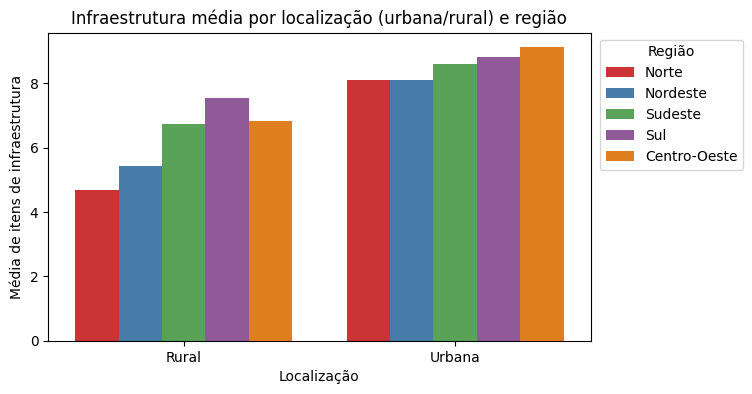

In [6]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=df_infra,
    x="LOCALIZACAO",
    y="TOTAL_INFRA",
    hue="NO_REGIAO",
    estimator="mean",
    errorbar = None,
    palette="Set1"
)
plt.title("Infraestrutura média por localização (urbana/rural) e região")
plt.ylabel("Média de itens de infraestrutura")
plt.xlabel("Localização")

plt.legend(
    title="Região",
    bbox_to_anchor=(1.005, 1),
    loc="upper left"
)
plt.show()

### Ranking de estados com maior percentual de escolas SEM água potável

Um dado essencial na análise da infraestrutura escolar é saber se as instituições de ensino garantem o mínimo necessário para o bem-estar dos estudantes — e isso inclui o acesso à água potável.

O gráfico abaixo mostra o percentual de escolas sem acesso à água potável em cada unidade federativa do Brasil, com base nos dados do Censo Escolar 2024. Os estados estão organizados do pior para o melhor cenário.

A análise revela uma realidade alarmante: em alguns estados, mais de 10% das escolas ainda funcionam sem acesso garantido a água potável — um direito humano fundamental e um requisito básico para a saúde, a dignidade e o aprendizado adequado.



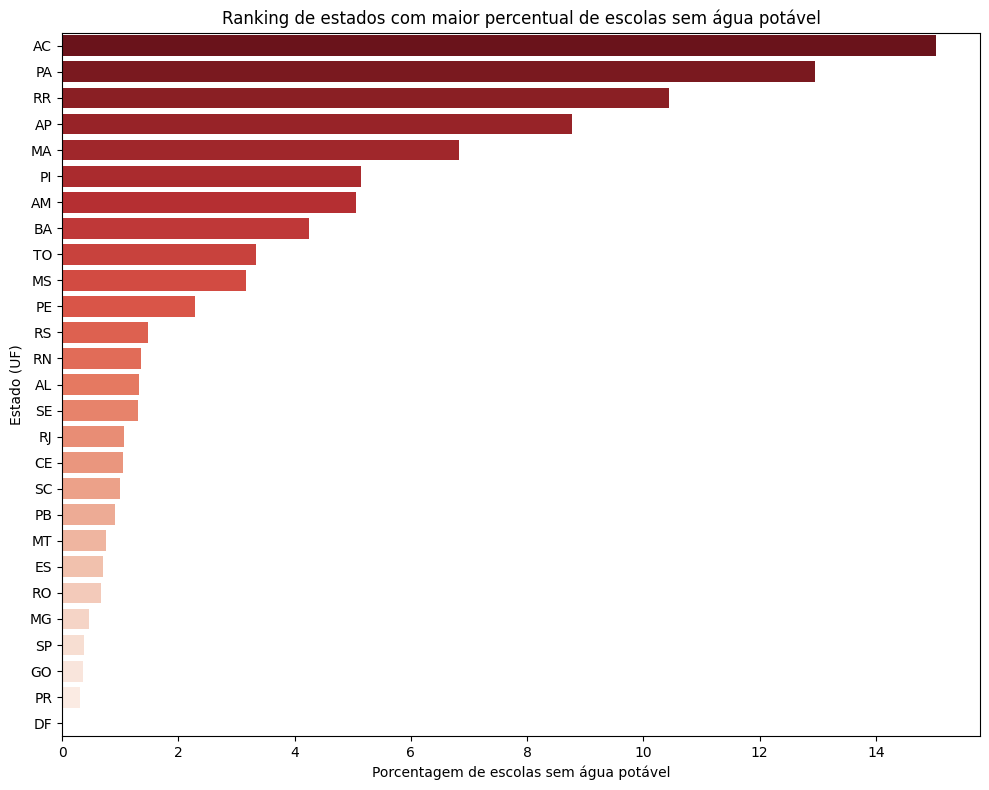

In [7]:
df_infra["SEM_AGUA_POTAVEL"] = df_infra["IN_AGUA_POTAVEL"].apply(lambda x: 1 if x == 0.0 else 0)

ranking_agua = df_infra.groupby("SG_UF")["SEM_AGUA_POTAVEL"].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,8))
sns.barplot(
    x=ranking_agua.values,
    y=ranking_agua.index,
    hue=ranking_agua.index,
    palette="Reds_r",
)

plt.title("Ranking de estados com maior percentual de escolas sem água potável")
plt.xlabel("Porcentagem de escolas sem água potável")
plt.ylabel("Estado (UF)")
plt.tight_layout()
plt.show()


### Painel de acessibilidade escolar

Outro dado fundamental na análise da infraestrutura escolar é a acessibilidade. Garantir que todas as crianças e adolescentes — inclusive aqueles com deficiência ou mobilidade reduzida — possam circular e utilizar os espaços escolares de forma segura e autônoma é uma condição básica para a inclusão e a equidade na educação.

O conjunto de gráficos abaixo mostra uma análise mais completa sobre a acessibilidade estrutural nas escolas brasileiras:

Os gráficos do topo comparam a proporção nacional de escolas com e sem:

- Banheiro acessível

- Estrutura acessível (rampa ou elevador)

Os gráficos da base mostram como as escolas com acessibilidade estão distribuídas pelas diferentes regiões do país.

A análise reforça a necessidade de ampliar políticas públicas de inclusão em todas as regiões, especialmente nas que apresentam menor participação relativa — evidenciando que a inclusão começa, literalmente, pela porta de entrada da escola.



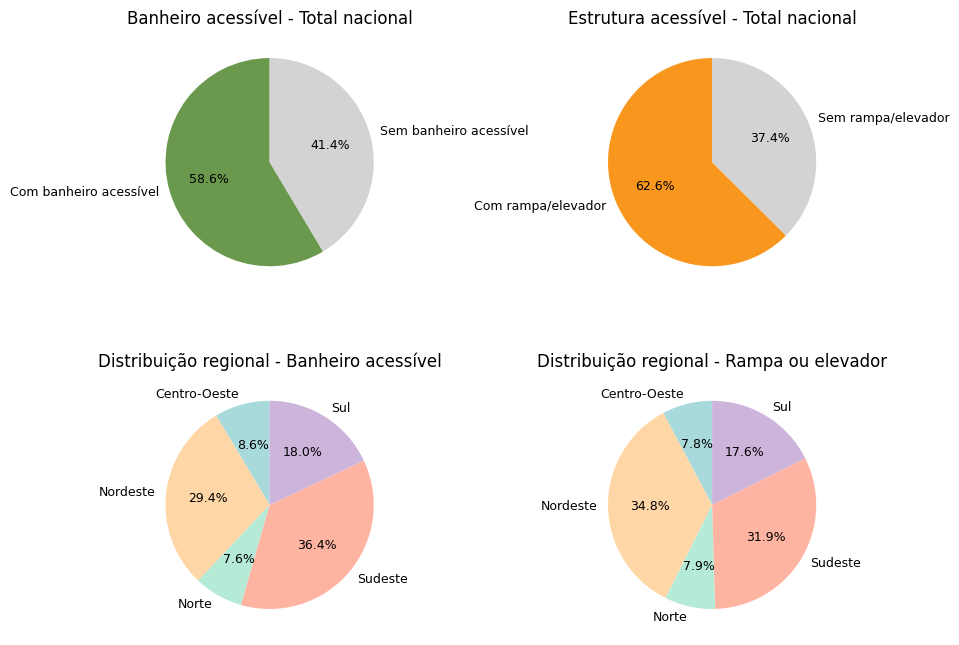

In [8]:
import matplotlib.pyplot as plt

# Criação da coluna de acessibilidade estrutural
df_infra["ACESSIBILIDADE_ESTRUTURAL"] = ((df_infra["IN_ACESSIBILIDADE_RAMPAS"] + df_infra["IN_ACESSIBILIDADE_ELEVADOR"]) > 0).astype(int)

# Total de escolas
total_escolas = len(df_infra)

# ---------- Gráficos 1 e 2 (percentual nacional com/sem) ----------

# Banheiro acessível
qtd_banheiro = df_infra["IN_BANHEIRO_PNE"].sum()
sem_banheiro = total_escolas - qtd_banheiro

# Estrutura acessível
qtd_estrutura = df_infra["ACESSIBILIDADE_ESTRUTURAL"].sum()
sem_estrutura = total_escolas - qtd_estrutura

# ---------- Gráficos 3 e 4 (porcentagem regional, apenas escolas com acessibilidade) ----------

# Filtrar apenas escolas com o recurso
df_banheiro = df_infra[df_infra["IN_BANHEIRO_PNE"] == 1]
df_estrutura = df_infra[df_infra["ACESSIBILIDADE_ESTRUTURAL"] == 1]

# Contagem por região
banheiro_regiao = df_banheiro["NO_REGIAO"].value_counts().sort_index()
estrutura_regiao = df_estrutura["NO_REGIAO"].value_counts().sort_index()

# Cores personalizadas
cores_banheiro = ["#6a994e", "#d3d3d3"]
cores_estrutura = ["#f8961e", "#d3d3d3"]
cores_regioes = ["#a8dadc", "#ffd6a5", "#b5ead7", "#ffb4a2", "#cdb4db"]

# ---------- PLOT ----------
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

# Gráfico 1: Banheiro acessível (total)
axs[0, 0].pie(
    [qtd_banheiro, sem_banheiro],
    labels=["Com banheiro acessível", "Sem banheiro acessível"],
    colors=cores_banheiro,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)
axs[0, 0].set_title("Banheiro acessível - Total nacional", fontsize=12)

# Gráfico 2: Estrutura acessível (total)
axs[0, 1].pie(
    [qtd_estrutura, sem_estrutura],
    labels=["Com rampa/elevador", "Sem rampa/elevador"],
    colors=cores_estrutura,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)
axs[0, 1].set_title("Estrutura acessível - Total nacional", fontsize=12)

# Gráfico 3: Banheiro acessível por região
axs[1, 0].pie(
    banheiro_regiao,
    labels=banheiro_regiao.index,
    colors=cores_regioes,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)
axs[1, 0].set_title("Distribuição regional - Banheiro acessível", fontsize=12)

# Gráfico 4: Estrutura acessível por região
axs[1, 1].pie(
    estrutura_regiao,
    labels=estrutura_regiao.index,
    colors=cores_regioes,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)
axs[1, 1].set_title("Distribuição regional - Rampa ou elevador", fontsize=12)

plt.tight_layout()
plt.show()


### Percentual de escolas com espaços pedagógicos e esportivos

Além do acesso a recursos básicos, a oferta de espaços pedagógicos e esportivos é essencial para garantir uma educação integral e significativa.

Cada gráfico abaixo mostra o percentual de escolas brasileiras que possuem determinados tipos de infraestrutura pedagógica e esportiva, como bibliotecas, laboratórios e quadras esportivas.

Os dados escancaram a carência estrutural ainda presente em grande parte das instituições de ensino. Itens como laboratórios de ciências e quadras cobertas, que deveriam ser comuns em qualquer escola que se proponha a oferecer uma educação de qualidade, estão ausentes em uma parcela significativa das unidades escolares.

Essa precariedade limita o acesso a práticas pedagógicas diversificadas, enfraquece o ensino de ciências, restringe atividades físicas regulares e compromete o desenvolvimento de competências essenciais. Trata-se não apenas de uma lacuna física, mas de uma expressão concreta das desigualdades educacionais no país, que afetam principalmente os alunos da rede pública em regiões menos favorecidas.




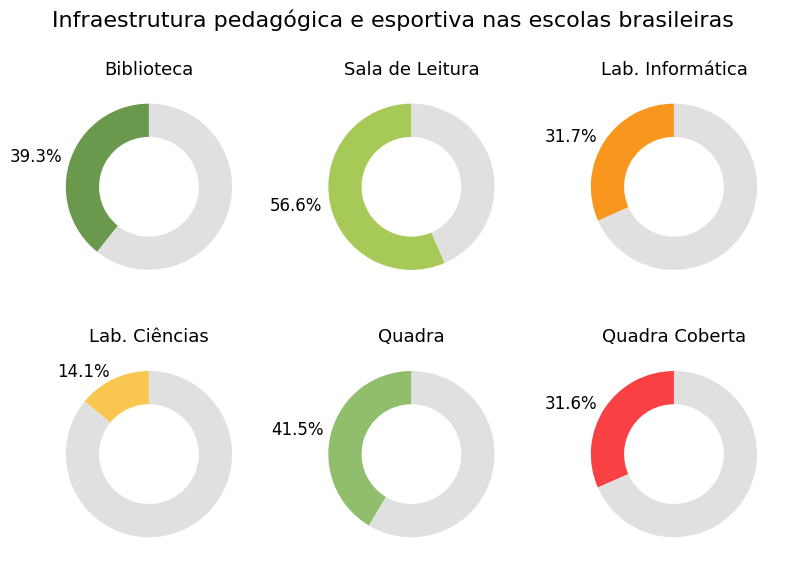

In [9]:
# Cálculo dos percentuais
dados = {
    "Biblioteca": df_infra["IN_BIBLIOTECA"].mean() * 100,
    "Sala de Leitura": df_infra["IN_BIBLIOTECA_SALA_LEITURA"].mean() * 100,
    "Lab. Informática": df_infra["IN_LABORATORIO_INFORMATICA"].mean() * 100,
    "Lab. Ciências": df_infra["IN_LABORATORIO_CIENCIAS"].mean() * 100,
    "Quadra": df_infra["IN_QUADRA_ESPORTES"].mean() * 100,
    "Quadra Coberta": df_infra["IN_QUADRA_ESPORTES_COBERTA"].mean() * 100,
}

cores = ["#6a994e", "#a7c957", "#f8961e", "#f9c74f", "#90be6d", "#f94144"]

# Plot
fig, axs = plt.subplots(2, 3, figsize=(8, 6))
axs = axs.flatten()

for i, (nome, valor) in enumerate(dados.items()):
    axs[i].pie(
        [valor, 100 - valor],
        colors=[cores[i], "#e0e0e0"],
        startangle=90,
        wedgeprops=dict(width=0.4),
        labels=[f"{valor:.1f}%", ""],
        textprops={'fontsize': 12},
    )
    axs[i].set_title(nome, fontsize=13)

plt.suptitle("Infraestrutura pedagógica e esportiva nas escolas brasileiras", fontsize=16)
plt.tight_layout()
plt.show()


# Conclusão

Este notebook teve como principal objetivo colocar em prática conhecimentos de tratamento e análise de dados utilizando Python em ambiente Jupyter Notebook, com apoio de bibliotecas como Pandas, Seaborn e Matplotlib. A partir da exploração dos microdados do Censo Escolar 2024, foi possível construir uma visão abrangente sobre a infraestrutura das escolas brasileiras, abordando aspectos como acesso à água potável, presença de bibliotecas, laboratórios, quadras esportivas e condições de acessibilidade.

Ao longo da análise, observou-se que grandes desigualdades persistem entre regiões, redes de ensino e áreas urbanas e rurais. Itens essenciais para a aprendizagem e o desenvolvimento dos estudantes — como banheiros adaptados, internet, quadras cobertas e laboratórios — ainda estão ausentes em muitas instituições, o que evidencia desafios estruturais profundos na educação básica do país.

Mais do que um exercício técnico, este trabalho reforça como a análise de dados pode ser uma ferramenta poderosa para dar visibilidade a realidades ocultas nos números brutos e contribuir para o debate público sobre políticas educacionais mais justas e eficazes.